# Example to showcase SimplePipeline.py

This example is mainly taken from Géron's book "Hands-On Machine Learning".

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import SimpleDataPipeline as sdp

# load the data
FILE_DIR = "datasets/"
# Note: The url given in Géron's book (2nd edition) did not work for me. But it did with raw.githack.
DATA_URL = "https://raw.githack.com/ageron/handson-ml2/master/datasets/housing/housing.tgz" 
try: 
    sdp.fetch_data(DATA_URL, FILE_DIR)
except FileExistsError:
    print("File already exists. Continue without download.")
finally:
     housing = pd.read_csv(FILE_DIR + "/housing.csv")

File already exists. Continue without download.


In [2]:
# to predict
to_predict = "median_house_value"

# income categories (bins) for the stratified split
housing["income_cat"] = pd.cut(
        housing["median_income"],
        bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
        labels=[1, 2, 3, 4, 5])
bins = housing["income_cat"]

# rooms per household (attributes 3 and 6) and population per household (attributes 5 and 6) as combined attributes
combine_attrs = [(3, 6), (5, 6)]

In [3]:
# apply the full transform
full_transform = sdp.full_transform(housing, bins, combine_attrs, to_predict)
housing_train = full_transform["transformed_train_set"]
housing_test = full_transform["transformed_test_set"]
housing_train_labels = full_transform["train_labels"]
housing_test_labels = full_transform["test_labels"]

print(housing_train[:,...,:5])

[[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821]
 [-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278 ]
 [ 1.18684903 -1.34218285  0.18664186 -0.31365989 -0.15334458]
 ...
 [ 1.58648943 -0.72478134 -1.56295222  1.04390119  0.82273495]
 [ 0.78221312 -0.85106801  0.18664186 -0.30991876 -0.37484891]
 [-1.43579109  0.99645926  1.85670895  0.22085348  0.36025337]]


## Models

### Linear regression

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train, housing_train_labels)
housing_lin_reg = lin_reg.predict(housing_train)

In [5]:
# testing the model
some_data = housing_train[:50]
some_labels = housing_train_labels[:50]
predictions = lin_reg.predict(some_data)
print("Predictions:", predictions)
print("Labels:", list(some_labels))

Predictions: [206345.09761431 328718.59887316 205334.76632827  62184.17728036
 199182.01160597 156509.94594648 426099.81217869 229319.76675334
 142234.91833411   6196.53262038 115490.66331357  88390.34603448
 326195.11608688 122388.93520304 126641.04896503 208528.49866802
 257583.17034022 107761.5450033  147073.99614334 209948.22688107
 224114.52920085 430564.0136255  210254.56824642 155986.60769359
  67053.67906417 140701.9761151  277983.70130032 134388.90281238
 174279.62047398 262327.96311445 294475.34175118 215950.14142026
 152904.97437902 185269.93760017 285343.47429229 317854.12006792
  23293.35808591 189695.79133201 139212.94058739 236643.29356576
 284040.3782543  252862.83030652 221515.67616827 315985.98340066
 200600.52550709 214447.99965145 102798.23908671 273390.73846802
 157559.56425407 266808.06606975]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0, 127900.0, 500001.0, 140200.0, 95000.0, 500001.0, 92100.0, 61500.0, 313000.0, 89000.0, 123900.0, 197400.0, 500001.0,

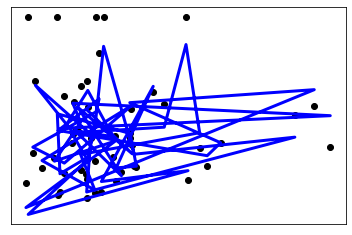

In [6]:
# plot model against data
%matplotlib inline
import matplotlib.pyplot as plt

X_total_rooms = housing_train[:50, 3]
y_test = housing_train_labels[:50]
y_pred = predictions[:50]

plt.scatter(X_total_rooms, y_test,  color='black')
plt.plot(X_total_rooms, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [7]:
# mean squared error on train set
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_train_labels, housing_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68740.58504347886

In [19]:
# evaluation on test set
test_housing_lin_reg = lin_reg.predict(housing_test)
test_lin_mse = mean_squared_error(test_housing_lin_reg, housing_test_labels)
test_lin_rmse = np.sqrt(test_mse)
test_lin_rmse

67230.65581228938

### Decision tree regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(housing_train, housing_train_labels)

DecisionTreeRegressor()

In [10]:
# evaluate the model on test data
housing_pred_dtr = dtr.predict(housing_train)
tree_mse = mean_squared_error(housing_train_labels, housing_pred_dtr)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [11]:
# tree_rmse indicates overfitting; use test set
test_housing_pred_dtr = dtr.predict(housing_test)
test_tree_rmse = np.sqrt(mean_squared_error(housing_test_labels, test_housing_pred_dtr))
test_tree_rmse

70577.5100677776

In [12]:
# verified large overfitting
# try with cross validation
from sklearn.model_selection import cross_val_score
dtr_scores = cross_val_score(dtr, housing_train, housing_train_labels, scoring = "neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)

In [13]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [14]:
display_scores(dtr_rmse_scores)

Scores: [71189.64750768 66576.80848921 67526.46916276 70861.18915491
 70891.62810738 75315.42672261 72668.5360046  70353.08666601
 74189.44288709 69566.91979861]
Mean: 70913.91545008591
Standard deviation: 2562.705505285876


In [15]:
# compare with linear regression
lin_scores = cross_val_score(lin_reg, housing_train, housing_train_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67622.96555556 66969.42885518 68038.18106876 74281.81467536
 68212.14410669 71596.32752869 65085.64097907 68291.88753841
 71978.34158707 68189.19982735]
Mean: 69026.59317221328
Standard deviation: 2599.0038835250384


### Random forests

In [16]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_train, housing_train_labels)
housing_pred_forest = forest_reg.predict(housing_train)
forest_mse = mean_squared_error(housing_train_labels, housing_pred_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18695.17772989973

In [17]:
forest_scores = cross_val_score(forest_reg, housing_train, housing_train_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49330.92921366 47240.83019633 49799.35924035 51859.86337512
 49422.11388711 53368.32476427 48952.7337125  48124.83036581
 52996.45345477 50356.10515809]
Mean: 50145.15433680167
Standard deviation: 1916.9627147492029


In [25]:
# finally evaluate on test set
test_housing_forest = forest_reg.predict(housing_test)
test_forest_mse = mean_squared_error(test_housing_forest, housing_test_labels)
test_forest_rmse = np.sqrt(test_forest_mse)
test_forest_rmse

48391.58820088938

## Optional: dumping the models

In [18]:
#import joblib

#joblib.dump(lin_reg, "lin_reg.pkl")
#joblib.dump(dtr, "dtr.pkl")
#joblib.dump(forest_reg, "forest_reg.pkl")